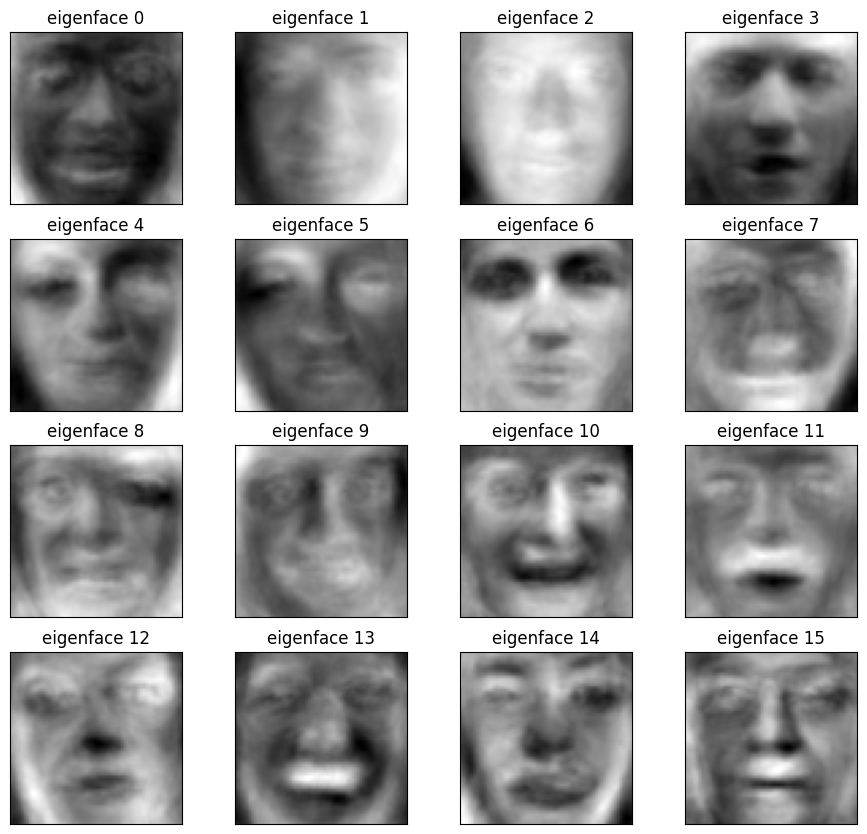

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os

"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

dir="/content/drive/MyDrive/Colab Notebooks/lfcrop_gray/f"
celebrity_photos=os.listdir(dir)
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]
n_samples, h, w = images.shape
#plot_portraits(images, celebrity_names, h, w, n_row=4, n_col=4)

def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    return projected, components, mean, centered_data

n_components = 150
X = images.reshape(n_samples, h*w)
P, C, M, Y= pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4) 

def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
recovered_images =[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
#plot_portraits(recovered_images, celebrity_names, h, w, n_row=4, n_col=4)

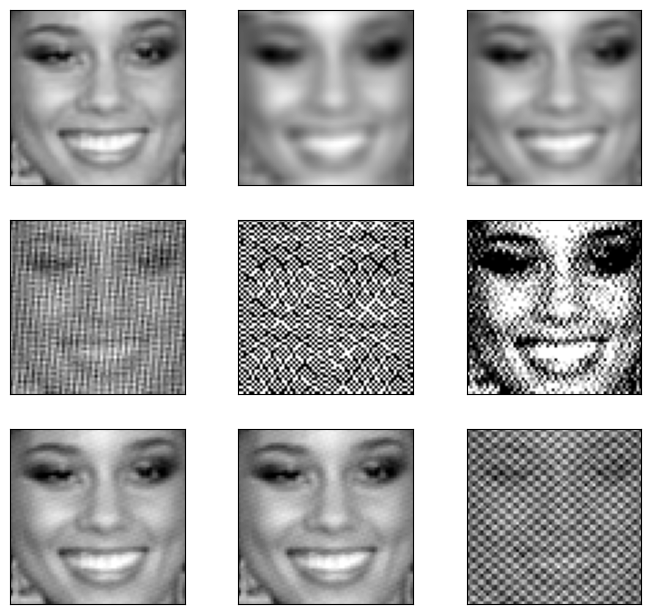

In [31]:
dir2 = "/content/drive/MyDrive/Colab Notebooks/lfcrop_gray/test"

test_photos=os.listdir(dir2)
test_images=[dir2+'/' + photo for photo in test_photos]

images2=np.array([plt.imread(image) for image in test_images], dtype=np.float64)
test_n_samples, h, w = images2.shape

test_X = images2.reshape(test_n_samples, h*w)
test_Y = test_X - M #centered test data 

test_weights = np.dot(test_Y, C.T) #Now we find its weights for the PCA

def plot_test(images, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_test(images2, h, w, n_row=3, n_col=3)

[185, 185, 185, 318, 246, 185, 185, 185, 290]


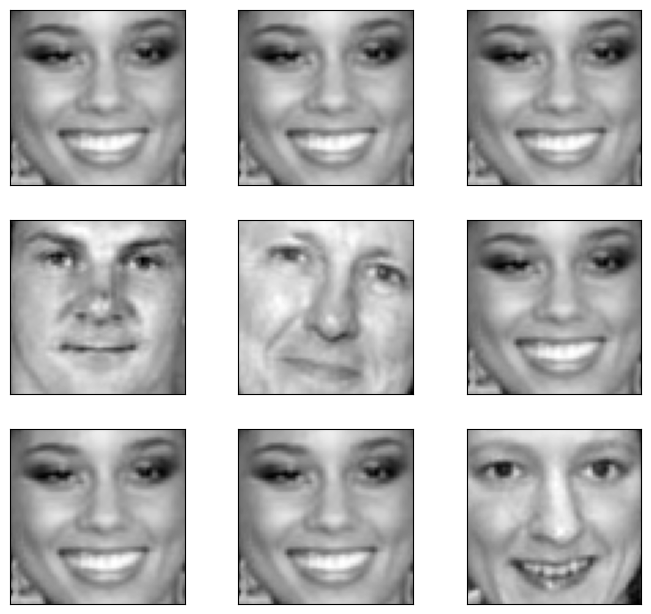

In [36]:
from numpy.linalg import norm
temp = []
a = []
approx_index = []
appr = []
for i in range(len(images2)):
  for j in range(len(images)):
    temp.insert(j, norm(test_weights[i,:]- P[j,:]))
  approx_index.insert(i, temp.index(min(temp)))
  temp = []

print(approx_index)

def plot_test_results(images, indices, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        k = indices[i]
        plt.imshow(images[k].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_test_results(images, approx_index, h, w, n_row=3, n_col=3)

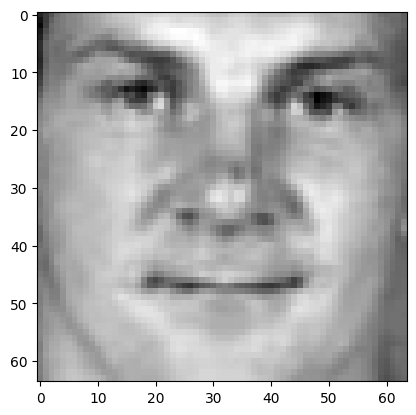

In [24]:
plt.imshow(images[318].reshape((h, w)), cmap=plt.cm.gray)

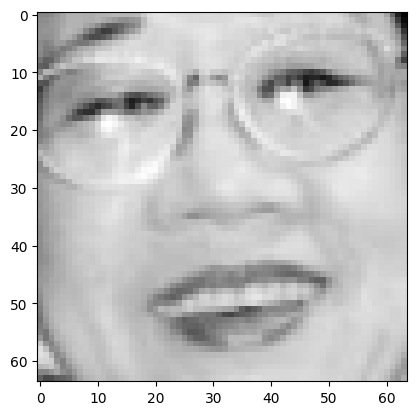

In [ ]:
plt.imshow(recovered_images[150].reshape((h, w)), cmap=plt.cm.gray)

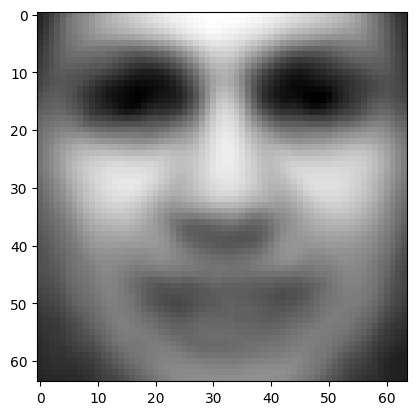

In [ ]:
plt.imshow(M.reshape((h, w)), cmap=plt.cm.gray)